In [154]:
######### GET & VISUALIZE THE DATA  ###########

In [155]:
#importing sys module + version to access python runtime Env variables and function

import sys
assert sys.version_info >= (3, 7)

In [156]:
#importing skit-learn libaray and checks for at least version 1.0.1

from packaging import version
import sklearn #Having problems finding module on 'sklearn' you may need to install the sklearn kernal
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [157]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data(): #funtion to fetch and load data
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file(): #if it does not find the housing file it creates the dataset directory in
        #current directory by default and and loads housing data into a pandas DataFrame named housing
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [158]:
#displaying displays the first five rows of the housing DataFrame
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [159]:
#counting how many times each unique value appears in the "ocean_proximity" column of the dataset
housing["ocean_proximity"].value_counts()

#providing summary of dataset: coumn names, data type, memory usage
housing.info()

#counting the # of occurrences of each unique value in the "ocean_proximity" column
housing["ocean_proximity"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [160]:
#providing statistical summaries: mean, median, standard deviation, etc.
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [161]:
import matplotlib.pyplot as plt #importing plot library / GIO- Added this because plt was undefined.
# extra code to save the figures as high-res PNGs for the book


IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

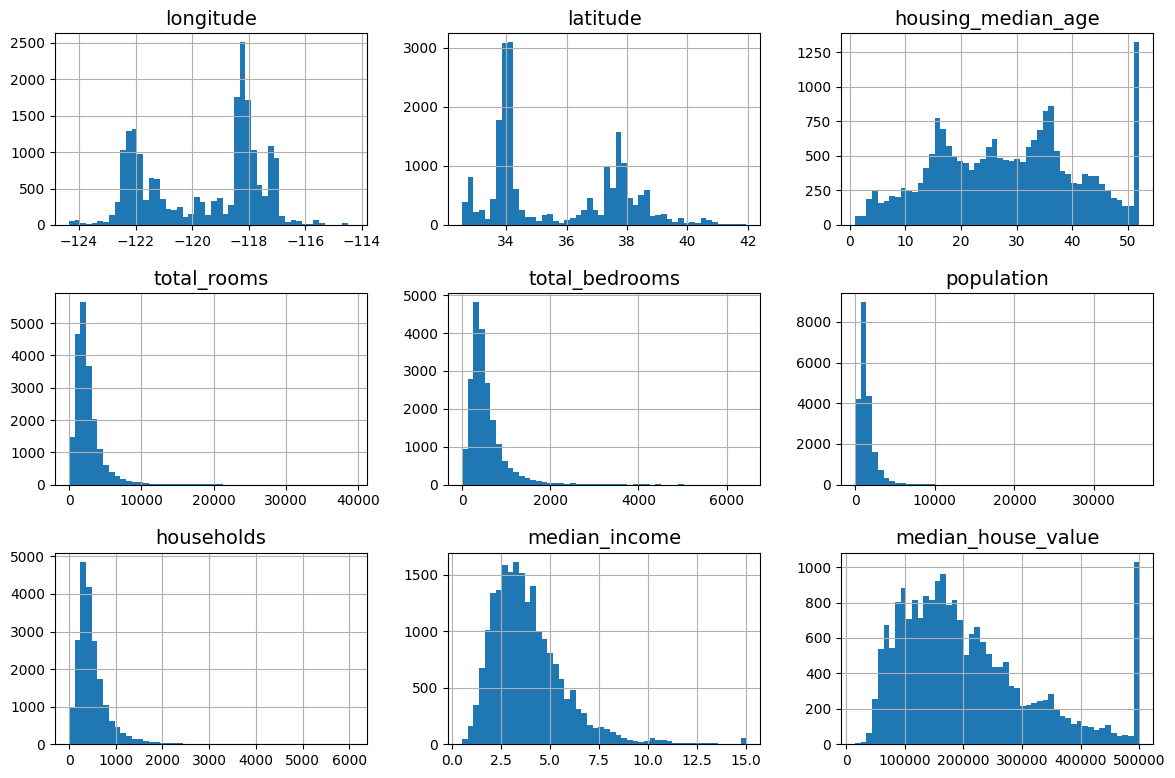

In [162]:

import matplotlib.pyplot as plt #importing plot library

# extra code the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8)) #creating historgram for all numeric columns 
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [163]:
######### CREATING THE TEST SET ############

In [164]:
import numpy as np #Starting to train the test set

#this portion shuffles and splits the data
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [165]:
#this trains it
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [166]:
#this checks length of test set
len(test_set)
np.random.seed(42)

In [167]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



In [168]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [169]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] #adds unique identifier, a districts latitude and longitude are guaranteed to be stable
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [170]:
'''
(Commentator- Gio)
Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split(), 
which does pretty much the same thing as the shuffle_and_split_data() function we defined earlier, with a couple of additional features.
'''

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [171]:
test_set["total_bedrooms"].isnull().sum()

44

In [172]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

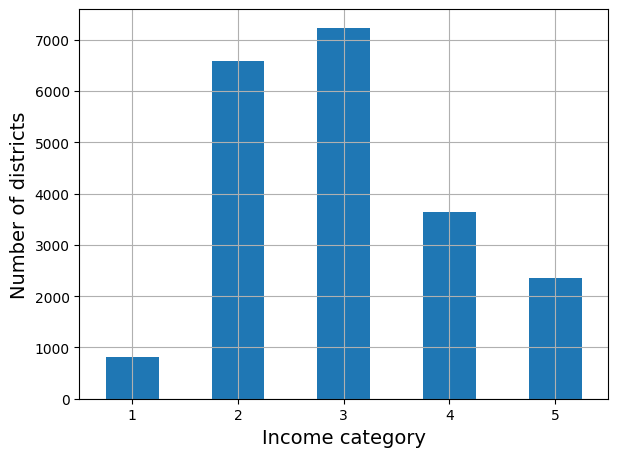

In [173]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [174]:
#(Commentator- Gio)the following code generates 10 different stratified splits of the same dataset

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [175]:
#(Commentator- Gio)you can just use the first split
strat_train_set, strat_test_set = strat_splits[0]

In [176]:
"""
(Commentator- Gio)
Or, since stratified sampling is fairly common, there is a shorter way to get a single split 
using the train_test_split() function with the stratify argument:
"""

strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [177]:
"""
(Commentator- Gio)
Dropping income_cat column since we won't use it again
"""

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [178]:
"""
(Commentator- Gio)
This portion is to explore and visualize the data to gain insights. 
The goal is to go into a little more depth.
"""
housing = strat_train_set.copy() #creates a copy to revert to

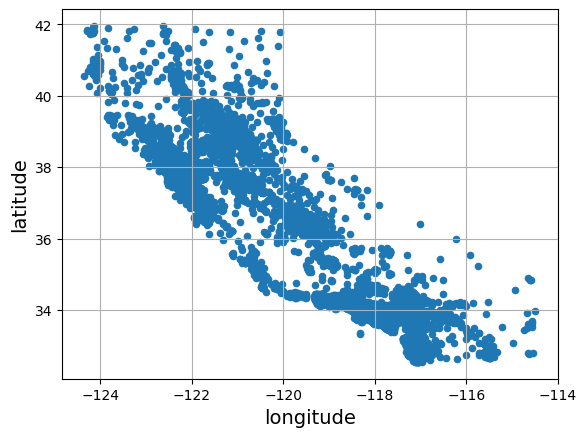

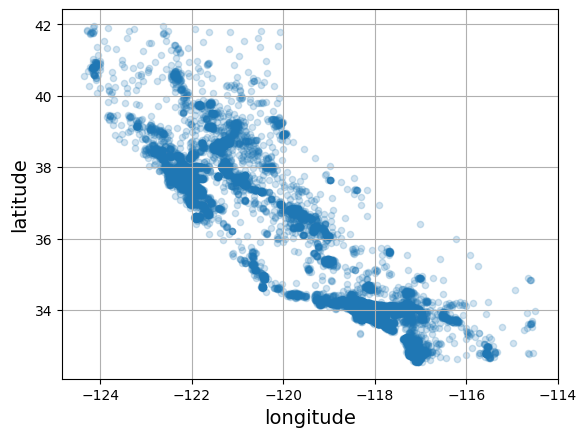

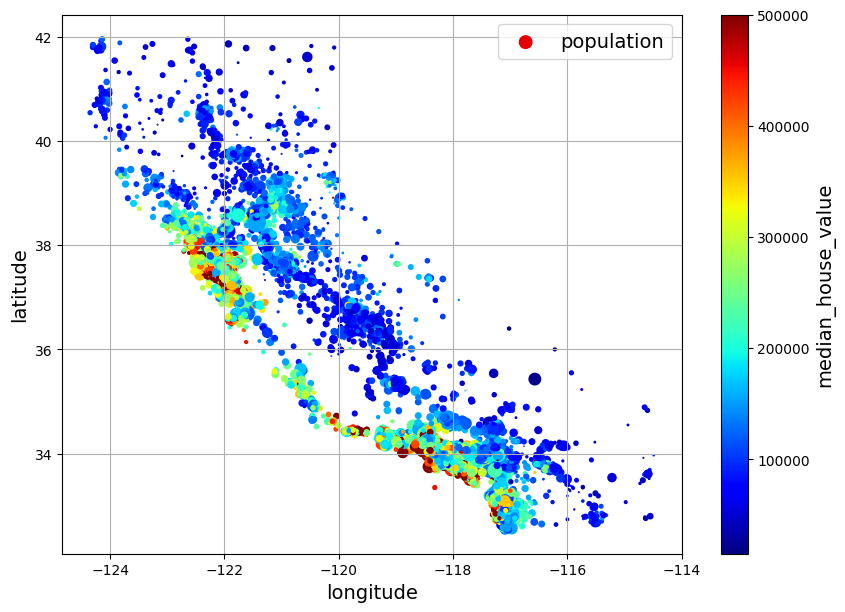

In [179]:
#(commentator-Gio) This creates a scatter plot of the data

#version 1
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

#version 2 - changed alpha to .2 to make it easier to see patterns
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

#version 3 - changed other attributes to recognize patterns in data furhter
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [180]:
"""
(commentator - Gio)
This computes the standard correlation coefficient (also called Pearsons r) between every pair of attributes using the corr() method
"""

corr_matrix = housing.corr()

C:\Users\GioDude\AppData\Local\Temp\ipykernel_17968\3235740844.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [181]:
#We are trying to look at how much each attribute correlates with the median house value.
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

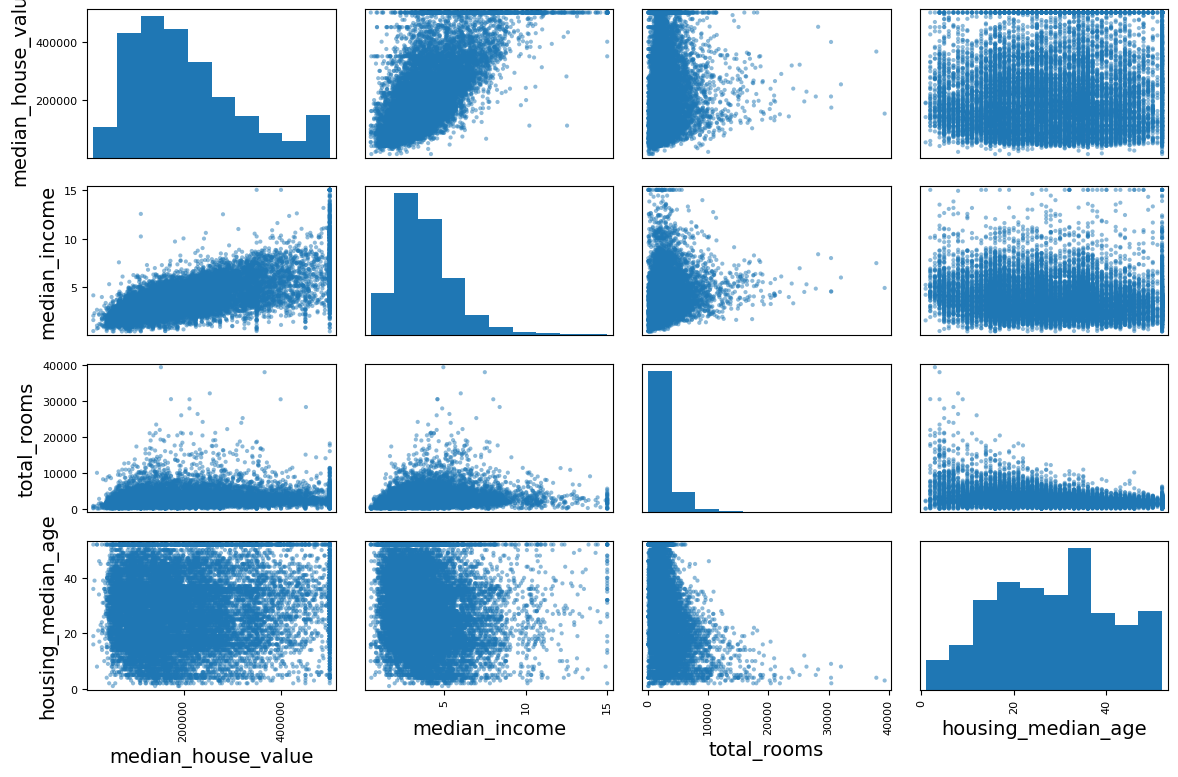

In [182]:
"""
(commentator - Gio)
 plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get 112 = 121 plots, 
 which would not fit on a page—so you decide to focus on a few promising attributes that seem most correlated with the median housing value

"""

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

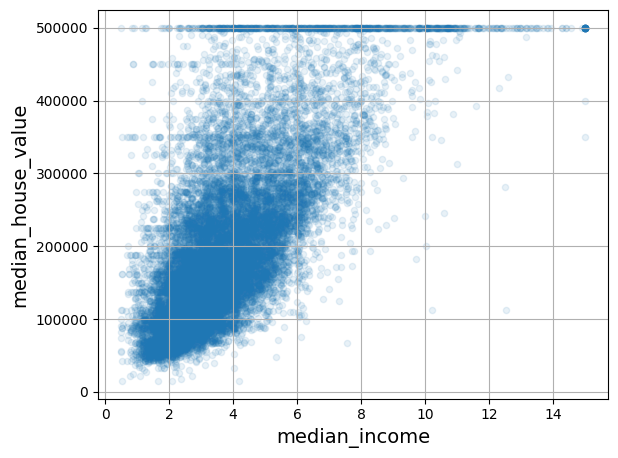

'\n(Commentator - Gio)\nIMPORTANT OVERVIEW OF THE CHART BELOW\nFirst, the correlation is indeed quite strong; you can clearly see the upward trend, and the points are not too dispersed. \nSecond, the price cap you noticed earlier is clearly visible as a horizontal line at $500,000. But the plot also reveals other \nless obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around $280,000, and a few more below that. \nYou may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.\n'

In [183]:
# the most promising attribute to predict the median house value is the median income
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

"""
(Commentator - Gio)
IMPORTANT OVERVIEW OF THE CHART BELOW
First, the correlation is indeed quite strong; you can clearly see the upward trend, and the points are not too dispersed. 
Second, the price cap you noticed earlier is clearly visible as a horizontal line at $500,000. But the plot also reveals other 
less obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around $280,000, and a few more below that. 
You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.
"""

In [184]:
#Experimenting with Attribute Combinations - Extra code
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\GioDude\AppData\Local\Temp\ipykernel_17968\315194601.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [185]:
"""
Prepare the Data for Machine Learning Algorithms:
This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).

You will gradually build a library of transformation functions that you can reuse in future projects.

You can use these functions in your live system to transform the new data before feeding it to your algorithms.

This will make it possible for you to easily try various transformations and see which combination of transformations works best.

"""

'\nPrepare the Data for Machine Learning Algorithms:\nThis will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).\n\nYou will gradually build a library of transformation functions that you can reuse in future projects.\n\nYou can use these functions in your live system to transform the new data before feeding it to your algorithms.\n\nThis will make it possible for you to easily try various transformations and see which combination of transformations works best.\n\n'

In [186]:
"""
(Commentator- Gio) FROM TEXTBOOK
Let's revert to the original training set and separate the target (note that strat_train_set.drop() 
creates a copy of strat_train_set without the column, it doesn't actually modify strat_train_set itself, 
unless you pass inplace=True):
"""

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [187]:
"""
total_bedrooms attribute has some missing values
You can accomplish these easily using the Pandas DataFrames dropna(), drop(), and fillna() methods
You have three options to fix this:

1. Get rid of the corresponding districts.
housing.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

2. Get rid of the whole attribute.
housing.drop("total_bedrooms", axis=1)  # option 2

3. Set the missing values to some value (zero, the mean, the median, etc.). This is called imputation.
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

!Textbook Choice - You decide to go for option 3 since it is the least destructive, 
but instead of the preceding code, you will use a handy Scikit-Learn class: SimpleImputer.
"""

'\ntotal_bedrooms attribute has some missing values\nYou can accomplish these easily using the Pandas DataFrames dropna(), drop(), and fillna() methods\nYou have three options to fix this:\n\n1. Get rid of the corresponding districts.\nhousing.dropna(subset=["total_bedrooms"], inplace=True)  # option 1\n\n2. Get rid of the whole attribute.\nhousing.drop("total_bedrooms", axis=1)  # option 2\n\n3. Set the missing values to some value (zero, the mean, the median, etc.). This is called imputation.\nmedian = housing["total_bedrooms"].median()  # option 3\nhousing["total_bedrooms"].fillna(median, inplace=True)\n\n!Textbook Choice - You decide to go for option 3 since it is the least destructive, \nbut instead of the preceding code, you will use a handy Scikit-Learn class: SimpleImputer.\n'

In [188]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

#found why null_rows_idx wasn't working/hard to find in the book and google collab. They should've put more emphasis on this.

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0             NaN   
18217    -117.96     34.03                35.0       2093.0             NaN   
11889    -118.05     34.04                33.0       1348.0             NaN   
20325    -118.88     34.17                15.0       4260.0             NaN   
14360    -117.87     33.62                 8.0       1266.0             NaN   

       population  households  median_income ocean_proximity  
14452      2503.0       902.0         3.5962          INLAND  
18217      1755.0       403.0         3.4115       <1H OCEAN  
11889      1098.0       257.0         4.2917       <1H OCEAN  
20325      1701.0       669.0         5.1033       <1H OCEAN  
14360       375.0       183.0         9.8020       <1H OCEAN

In [189]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0           434.0   
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income ocean_proximity  
14452      2503.0       902.0         3.5962          INLAND  
18217      1755.0       403.0         3.4115       <1H OCEAN  
11889      1098.0       257.0         4.2917       <1H OCEAN  
20325      1701.0       669.0         5.1033       <1H OCEAN  
14360       375.0       183.0         9.8020       <1H OCEAN

In [190]:
#option 3 modified
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [191]:
#create a copy of the data with only the numerical attributes
housing_num = housing.select_dtypes(include=[np.number])

In [192]:
#fit the imputer instance to the training data using the fit() method
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [193]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [194]:
#Reference for imputer.statistics_ , checks manually to make sure they match
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [195]:
#Transform the training set: 

X = imputer.transform(housing_num)

"""
(Commentator - Gio)
Fixed the problem here, found the code snippet that defined null_rows_idx
"""

imputer.feature_names_in_

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.loc[null_rows_idx].head()

imputer.strategy

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.loc[null_rows_idx].head()# not shown in the book



longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0           434.0   
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income  
14452      2503.0       902.0         3.5962  
18217      1755.0       403.0         3.4115  
11889      1098.0       257.0         4.2917  
20325      1701.0       669.0         5.1033  
14360       375.0       183.0         9.8020

In [196]:
#Dropping outliers:

from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [197]:
#Preprocessing the categorical input feature, ocean_proximmity:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
1286           INLAND
18078       <1H OCEAN
4396         NEAR BAY

In [198]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [199]:
housing_cat_encoded[:8]
ordinal_encoder.categories_

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

#housing_cat_1hot
# By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array 
# if needed by calling the toarray() method:
#Side Note: OneHotEncoder is smarter: it will detect the unknown category and raise an exception, better then get_dummies()

housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [200]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [201]:
#example using dummies
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

ocean_proximity_INLAND  ocean_proximity_NEAR BAY
0                       1                         0
1                       0                         1

In [202]:
#example using encoder
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [203]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
0                          1                       0
1                          0                       1

In [204]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [205]:
#(Gio)issue here not 100% sure why...

"""
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)
df_output
"""


'\ncat_encoder.feature_names_in_\ncat_encoder.get_feature_names_out()\ndf_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),\n                         columns=cat_encoder.get_feature_names_out(),\n                         index=df_test_unknown.index)\ndf_output\n'

TIP: never use fit() or fit_transform() for anything else than the training set.

In [206]:
"""
Min-max scaling (many people call this normalization) is the simplest: for each attribute, 
the values are shifted and rescaled so that they end up ranging from 0 to 1.
"""
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [207]:
#Scikit-Learn provides a transformer called StandardScaler for standardization:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [208]:
"""
# extra code - this cell generates Figure 2-17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()
"""

'\n# extra code - this cell generates Figure 2-17\nfig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)\nhousing["population"].hist(ax=axs[0], bins=50)\nhousing["population"].apply(np.log).hist(ax=axs[1], bins=50)\naxs[0].set_xlabel("Population")\naxs[1].set_xlabel("Log of population")\naxs[0].set_ylabel("Number of districts")\nsave_fig("long_tail_plot")\nplt.show()\n'

In [209]:
"""
# extra code - just shows that we get a uniform distribution
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).
"""

'\n# extra code - just shows that we get a uniform distribution\npercentiles = [np.percentile(housing["median_income"], p)\n               for p in range(1, 100)]\nflattened_median_income = pd.cut(housing["median_income"],\n                                 bins=[-np.inf] + percentiles + [np.inf],\n                                 labels=range(1, 100 + 1))\nflattened_median_income.hist(bins=50)\nplt.xlabel("Median income percentile")\nplt.ylabel("Number of districts")\nplt.show()\n# Note: incomes below the 1st percentile are labeled 1, and incomes above the\n# 99th percentile are labeled 100. This is why the distribution below ranges\n# from 1 to 100 (not 0 to 100).\n'

Another approach to transforming multimodal distributions is to add a feature for each of the modes (at least the main ones), representing the similarity between the housing median age and that particular mode. The similarity measure is typically computed using a radial basis function (RBF)—any function that depends only on the distance between the input value and a fixed point.The most commonly used RBF is the Gaussian RBF

In [210]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [211]:
"""
# extra code - this cell generates Figure 2-18

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()
"""

'\n# extra code - this cell generates Figure 2-18\n\nages = np.linspace(housing["housing_median_age"].min(),\n                   housing["housing_median_age"].max(),\n                   500).reshape(-1, 1)\ngamma1 = 0.1\ngamma2 = 0.03\nrbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)\nrbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)\n\nfig, ax1 = plt.subplots()\n\nax1.set_xlabel("Housing median age")\nax1.set_ylabel("Number of districts")\nax1.hist(housing["housing_median_age"], bins=50)\n\nax2 = ax1.twinx()  # create a twin axis that shares the same x-axis\ncolor = "blue"\nax2.plot(ages, rbf1, color=color, label="gamma = 0.10")\nax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")\nax2.tick_params(axis=\'y\', labelcolor=color)\nax2.set_ylabel("Age similarity", color=color)\n\nplt.legend(loc="upper left")\nsave_fig("age_similarity_plot")\nplt.show()\n'

DESCRIPTION FOR CODE BELOW:
the following code example shows how to scale the labels using a StandardScaler (just like we did for inputs), then train a simple linear regression model on the resulting scaled labels and use it to make predictions on some new data, which we transform back to the original scale using the trained scaler's inverse_transform() method.

In [212]:
#Read above ^^^^^
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [213]:
#simpler option is to use a TransformedTargetRegressor
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

CUSTOM TRANSFORMERS: 
Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom transformations, cleanup operations, or combining specific attributes.

For transformations that don't require any training, you can just write a function that takes a NumPy array as input and outputs the transformed array. 

In [214]:
#create a log-transformer and apply it to the population feature:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

#NOTE: The inverse_func argument is optional

In [215]:
# create a transformer that computes the same Gaussian RBF similarity measure as earlier:
#NOTE: no inverse function for the RBF kernel, since there are always two values at a given distance from a fixed point (except at distance 0)
#NOTE: rbf_kernel() does not treat the features separately
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [216]:
# how to add a feature that will measure the geographic similarity between each district and San Francisco:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [217]:
#FunctionTransformer that computes the ratio between the input features 0 and 1:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [218]:
#here's a custom transformer that acts much like the StandardScaler:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

NOTE: This is for the code above!
The sklearn.utils.validation package contains several functions we can use to validate the inputs. For simplicity, we will skip such tests in the rest of this book, but production code should have them.

Scikit-Learn pipelines require the fit() method to have two arguments X and y, which is why we need the y=None argument even though we don't use y.

All Scikit-Learn estimators set n_features_in_ in the fit() method, and they ensure that the data passed to transform() or predict() has this number of features.

The fit() method must return self.

This implementation is not 100% complete: all estimators should set feature_names_in_ in the fit() method when they are passed a DataFrame. Moreover, all transformers should provide a get_feature_names_out() method, as well as an inverse_transform() method when their transformation can be reversed. See the last exercise at the end of this chapter for more details.


In [219]:
#he following code demonstrates custom transformer that uses a KMeans clusterer in the fit() method 
#to identify the main clusters in the training data, and then uses rbf_kernel() in the transform() 
#method to measure how similar each sample is to each cluster center:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [220]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)
similarities[:3].round(2)

#NOTE:(GIO)RESULTS DIFFER FROM TEXTBOOK HERE 

c:\Users\GioDude\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

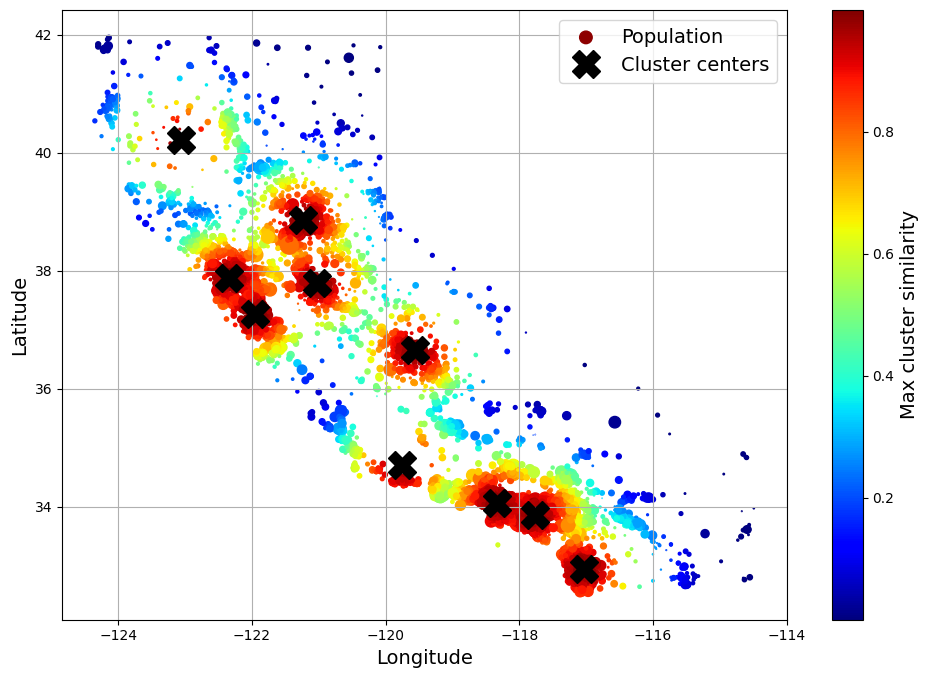

In [221]:
# extra code - this cell generates Figure 2-19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

In [222]:
#small pipeline for numerical attributes, which will first impute then scale the input features:
#NOTE:Scikit-Learn provides the Pipeline class to help with such sequences of transformations

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [223]:
#f you don't want to name the transformers, you can use the make_pipeline()
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [224]:
#NOTE: (GIO)So this portion was within the google collab docs however it was not in the textbook
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [225]:
#Let's call the pipeline's fit_transform() method and look at the output's first two rows, rounded to two decimal places:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [226]:
#This was added by the google collab dock, seems there was some classes which had some issues with Scikit-Learn 1.0
def monkey_patch_get_signature_names_out():
    """NOTE:Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [227]:
# if you want to recover a nice DataFrame, you can use the pipeline's get_feature_names_out() method:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

df_housing_num_prepared.head(2)  # extra code displays table

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -1.423037  1.013606            1.861119     0.311912        1.368167   
14973   0.596394 -0.702103            0.907630    -0.308620       -0.435925   

       population  households  median_income  
13096    0.137460    1.394812      -0.936491  
14973   -0.693771   -0.373485       1.171942

In [228]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [229]:
num_pipeline[1]

StandardScaler()

In [230]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [231]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [232]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [233]:
"""
The following ColumnTransformer will apply num_pipeline (the one we just defined) to the numerical attributes 
and cat_pipeline to the categorical attribute:
"""
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [234]:
"""
the following code creates the same ColumnTransformer as earlier, except the transformers 
are automatically named "pipeline-1" and "pipeline-2" instead of "num" and "cat":

"""
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [235]:
#apply this ColumnTransformer to the housing data:
housing_prepared = preprocessing.fit_transform(housing)

# extra code - shows that we can get a DataFrame out if we want
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

pipeline-1__longitude  pipeline-1__latitude  \
13096              -1.423037              1.013606   
14973               0.596394             -0.702103   

       pipeline-1__housing_median_age  pipeline-1__total_rooms  \
13096                        1.861119                 0.311912   
14973                        0.907630                -0.308620   

       pipeline-1__total_bedrooms  pipeline-1__population  \
13096                    1.368167                0.137460   
14973                   -0.435925               -0.693771   

       pipeline-1__households  pipeline-1__median_income  \
13096                1.394812                  -0.936491   
14973               -0.373485                   1.171942   

       pipeline-2__ocean_proximity_<1H OCEAN  \
13096                                    0.0   
14973                                    1.0   

       pipeline-2__ocean_proximity_INLAND  pipeline-2__ocean_proximity_ISLAND  \
13096                                 0.0                                 0.0   
14973                                 0.0                                 0.0   

       pipeline-2__ocean_proximity_NEAR BAY  \
13096                                   1.0   
14973                                   0.0   

       pipeline-2__ocean_proximity_NEAR OCEAN  
13096                                     0.0  
14973                                     0.0

Your project is going really well and you're almost ready to train some models! You now want to create a single pipeline that will perform all the transformations you've experimented with up to now. Let's recap what the pipeline will do and why:

Missing values in numerical features will be imputed by replacing them with the median, as most ML algorithms don't expect missing values. In categorical features, missing values will be replaced by the most frequent category.

The categorical feature will be one-hot encoded, as most ML algorithms only accept numerical inputs.

A few ratio features will be computed and added: bedrooms_ratio, rooms_per_house, and people_per_house. Hopefully these will better correlate with the median house value, and thereby help the ML models.

A few cluster similarity features will also be added. These will likely be more useful to the model than latitude and longitude.

Features with a long tail will be replaced by their logarithm, as most models prefer features with roughly uniform or Gaussian distributions.

All numerical features will be standardized, as most ML algorithms prefer when all features have roughly the same scale.

In [236]:
"""
The code that builds the pipeline to do all of this should look familiar to you by now:
"""

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [237]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

c:\Users\GioDude\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(16512, 24)

In [238]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

Select and Train a Model:

In [239]:
#train a very basic linear regression model to get started:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

c:\Users\GioDude\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A28EC5ED90>)])),
                ('linearregression', LinearRegression())])

In [ ]:
#Let's try the full preprocessing pipeline on a few training instances:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

In [ ]:
#Compare against the actual values:
housing_labels.iloc[:5].values